In [1]:
import pandas as pd
data = pd.read_csv("compressed_dataset.csv")

data.head(10)

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0
5,93,1632762134093,5.0,107.0,105152.0,62.0,3.0,WFH,1.000000,0.0,0
6,108,1632762160299,5.0,107.0,4168.0,2.0,3.0,WFO,1.000000,0.9,0
7,123,1632762170855,5.0,107.0,6704.0,62.0,3.0,WFH,0.999990,0.9,402
8,146,1632762181546,5.0,107.0,4623.0,2.0,3.0,WFO,1.000000,0.9,0
9,161,1632762218942,5.0,107.0,22415.0,2.0,3.0,WFO,1.000000,0.9,0


In [2]:
from datetime import datetime
x=[]
for j in range(len(data)):
    x.append(datetime.fromtimestamp(data["timestamp"][j]/1000))
    
    
data["date"] = x
data

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 20:01:05.906
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 20:01:44.254
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 20:01:48.299
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 20:01:52.510
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 20:02:09.231
...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,309106383,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0,2022-03-21 16:17:44.309
20615366,309106397,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0,2022-03-21 16:17:56.879
20615367,309106412,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0,2022-03-21 16:18:08.293
20615368,309106427,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0,2022-03-21 16:18:08.564


In [10]:
data['Month'] = pd.DatetimeIndex(data['date']).month
data["Month"].value_counts()

11    17358
12    15821
3     15123
10    12792
2     12119
1      7439
9      1809
Name: Month, dtype: int64

In [4]:
records_by_month = data.groupby(["Month"])["viewer_id"].count()
records_by_month

Month
1     1434
2     2321
3     2906
9      358
10    2458
11    3335
12    3045
Name: viewer_id, dtype: int64

# viewers’ engagement distribution over time, taking into account the 

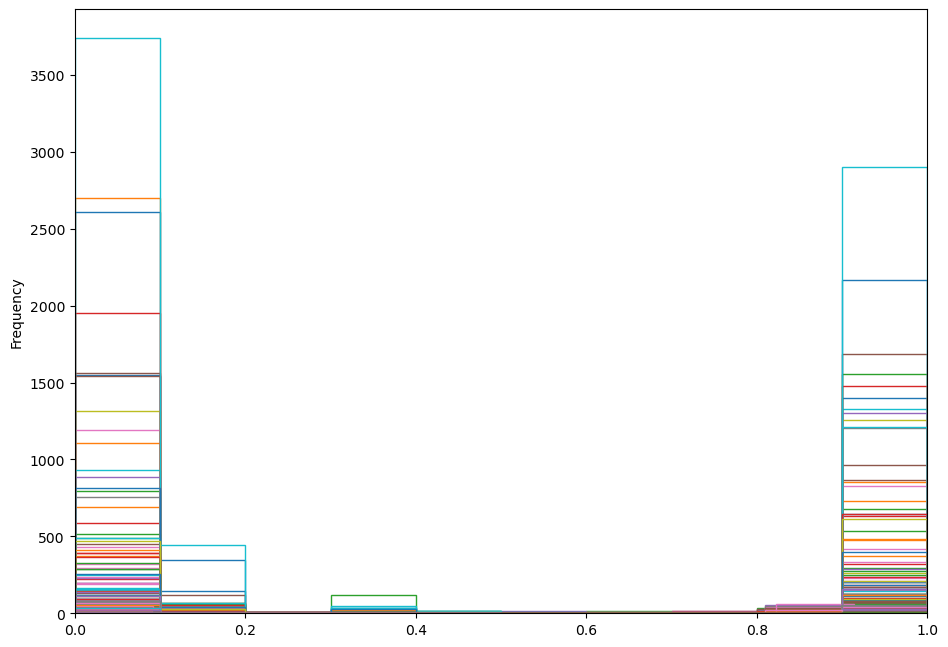

In [11]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
gk = data.groupby('Month')
fig=plt.figure(figsize=(11,8),dpi=100)
months = [1,2,3,9,10,11,12]
colors = ["y", "g", "m","c","r", "b", "k"]
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("country_id")["engagement"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
    
    
plt.show()

### • Viewers’ engagement distribution over time, taking into account the customer id

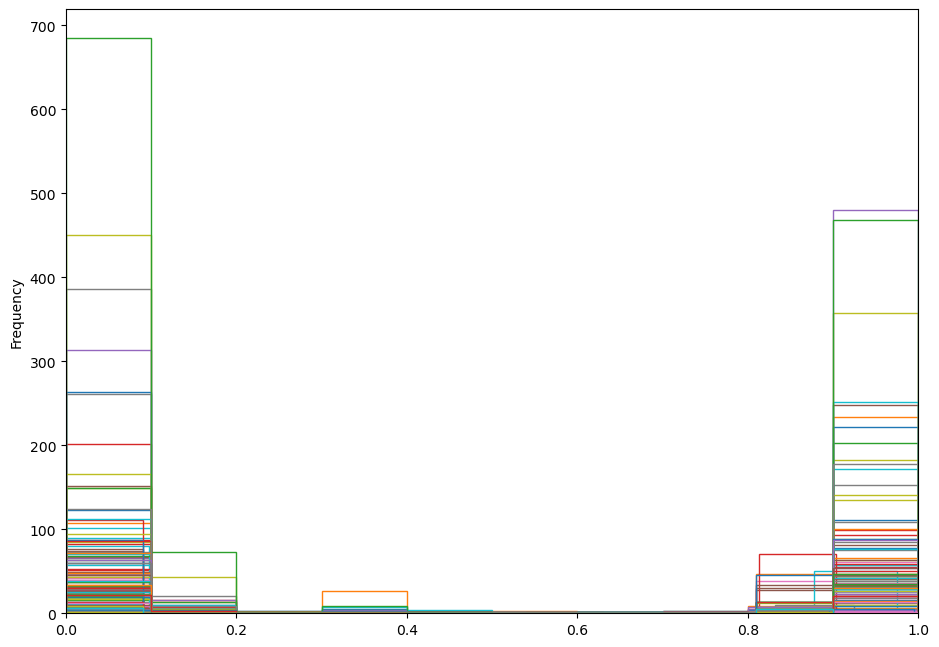

In [6]:

fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("customer_id")["engagement"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
    



    
plt.show()




### • Viewers’ engagement distribution over time, taking into account the city id

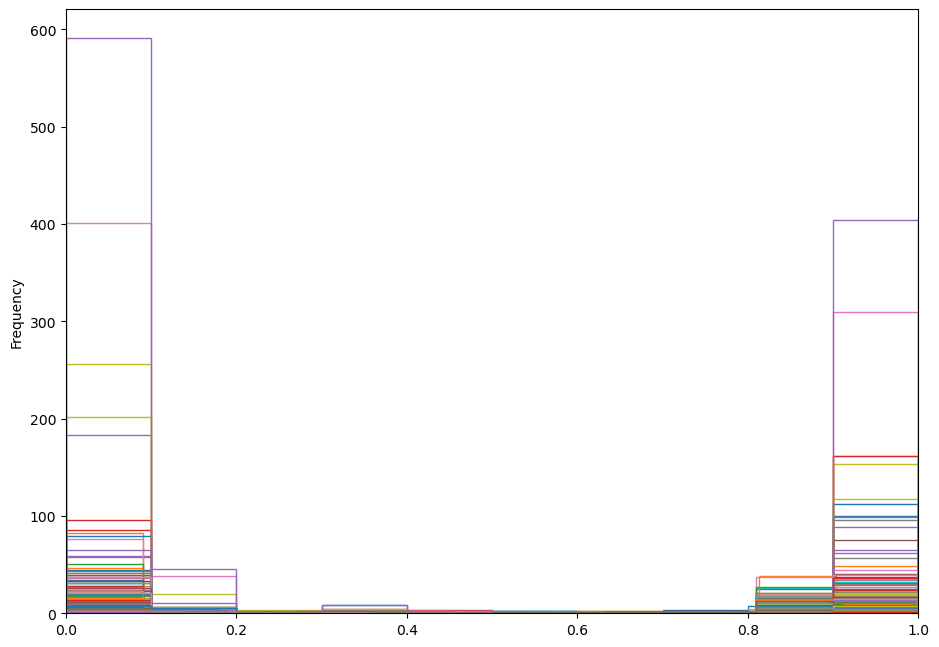

In [7]:

fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("city_id")["engagement"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
    
    
plt.show()


### Viewers’ QoE distribution over time, taking into account the country id

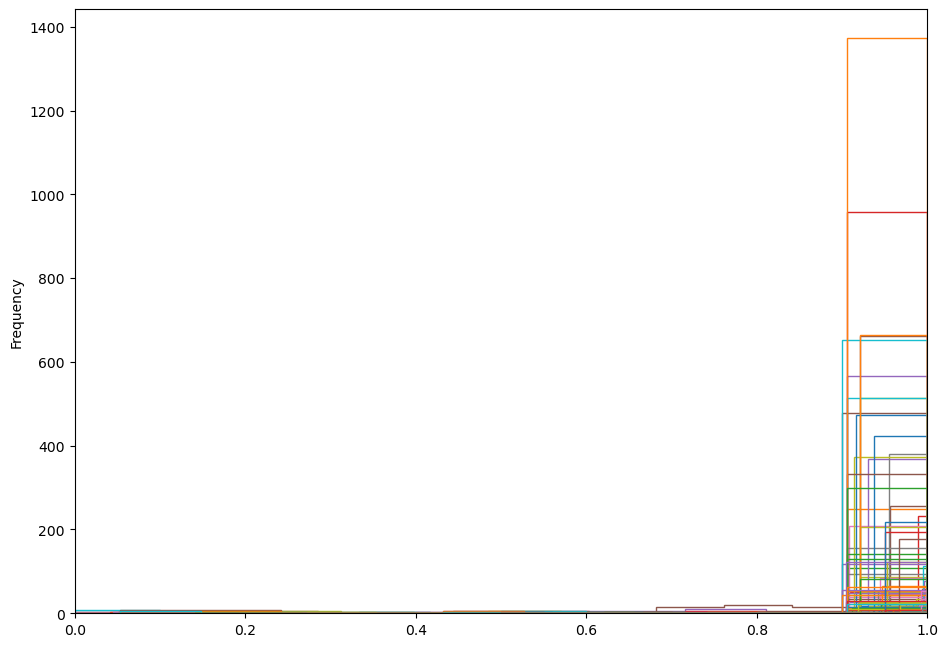

In [8]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("country_id")["qoe"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
    



    
plt.show()




### Viewers’ QoE distribution over time, taking into account the customer id

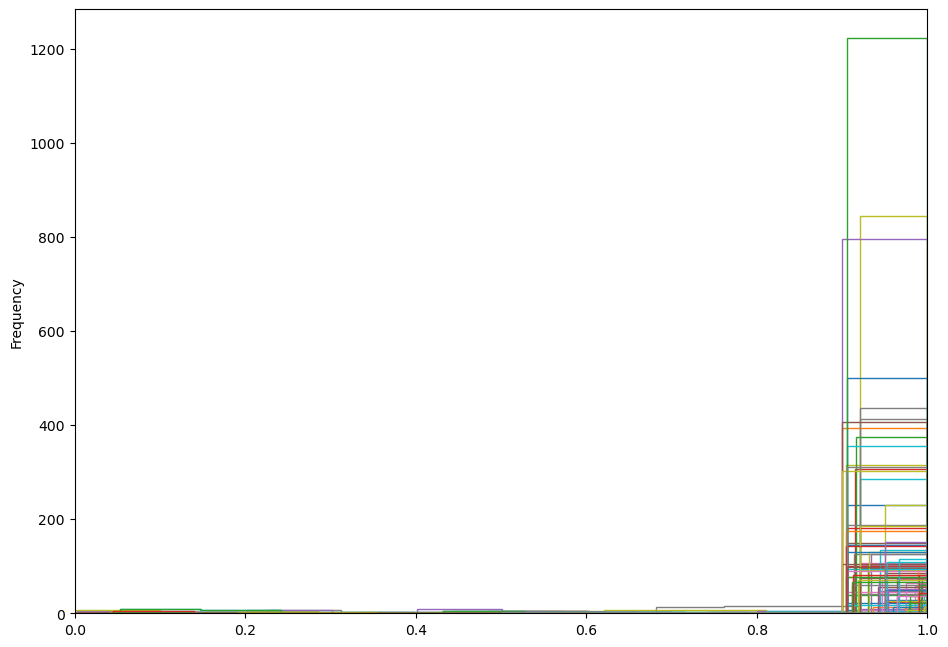

In [9]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("customer_id")["qoe"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
    



    
plt.show()




### Viewers’ QoE distribution over time, taking into account the city id

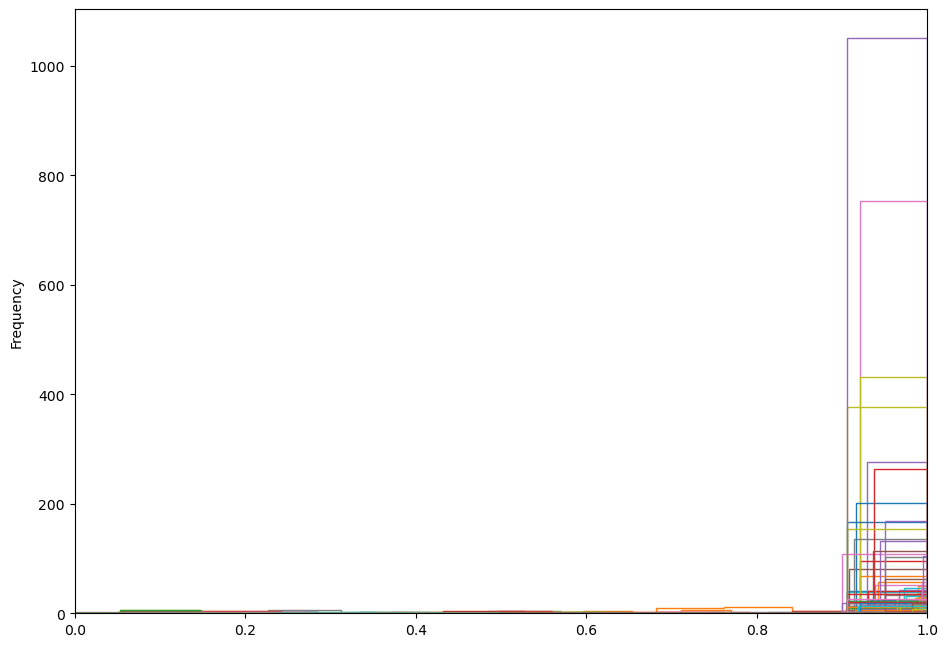

In [10]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)
for i in range(0,len(months)):
    gk.get_group(months[i]).groupby("city_id")["qoe"].plot.hist(colors[i],  histtype='step', stacked=True, fill=False)
       
plt.show()




In [11]:
from scipy.stats import ks_2samp
list_months = [1,2,3,9,10,11,12]
#perform Kolmogorov-Smirnov test
#if p_value is greater than 0.05 we reject the null hypothsesis and the 2 distributions are equal
for i in list_months:
    res=ks_2samp((gk.get_group(i)).groupby("viewer_type")["qoe"].value_counts(), (gk.get_group(1)).groupby("viewer_type")["engagement"].value_counts())
    print("p_value of Month "+str(i) +" is",res.pvalue)
    if res.pvalue>0.05:
        print("The distributions of Month "+str(i)+" are equal"+"\n")
    else: 
        print("The two distributions are not equal"+"\n")

p_value of Month 1 is 0.8285376116961467
The distributions of Month 1 are equal

p_value of Month 2 is 0.6203048872707546
The distributions of Month 2 are equal

p_value of Month 3 is 0.5011991311618131
The distributions of Month 3 are equal

p_value of Month 9 is 0.999361121319352
The distributions of Month 9 are equal

p_value of Month 10 is 0.6731129693112444
The distributions of Month 10 are equal

p_value of Month 11 is 0.7625203314682033
The distributions of Month 11 are equal

p_value of Month 12 is 0.7450975043110646
The distributions of Month 12 are equal



viewer_type
WFH    AxesSubplot(0.125,0.125;0.775x0.755)
WFO    AxesSubplot(0.125,0.125;0.775x0.755)
Name: qoe, dtype: object

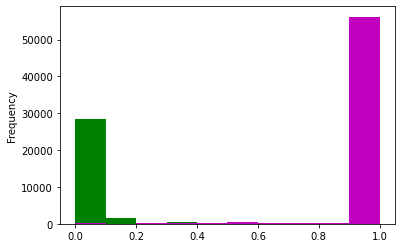

In [25]:

data.groupby("viewer_type")["engagement"].plot.hist(color ="g" )
data.groupby("viewer_type")["qoe"].plot.hist(color = "m")

# Countries/Cities that follow different distributions per customer.

<AxesSubplot:xlabel='customer_id', ylabel='Density'>

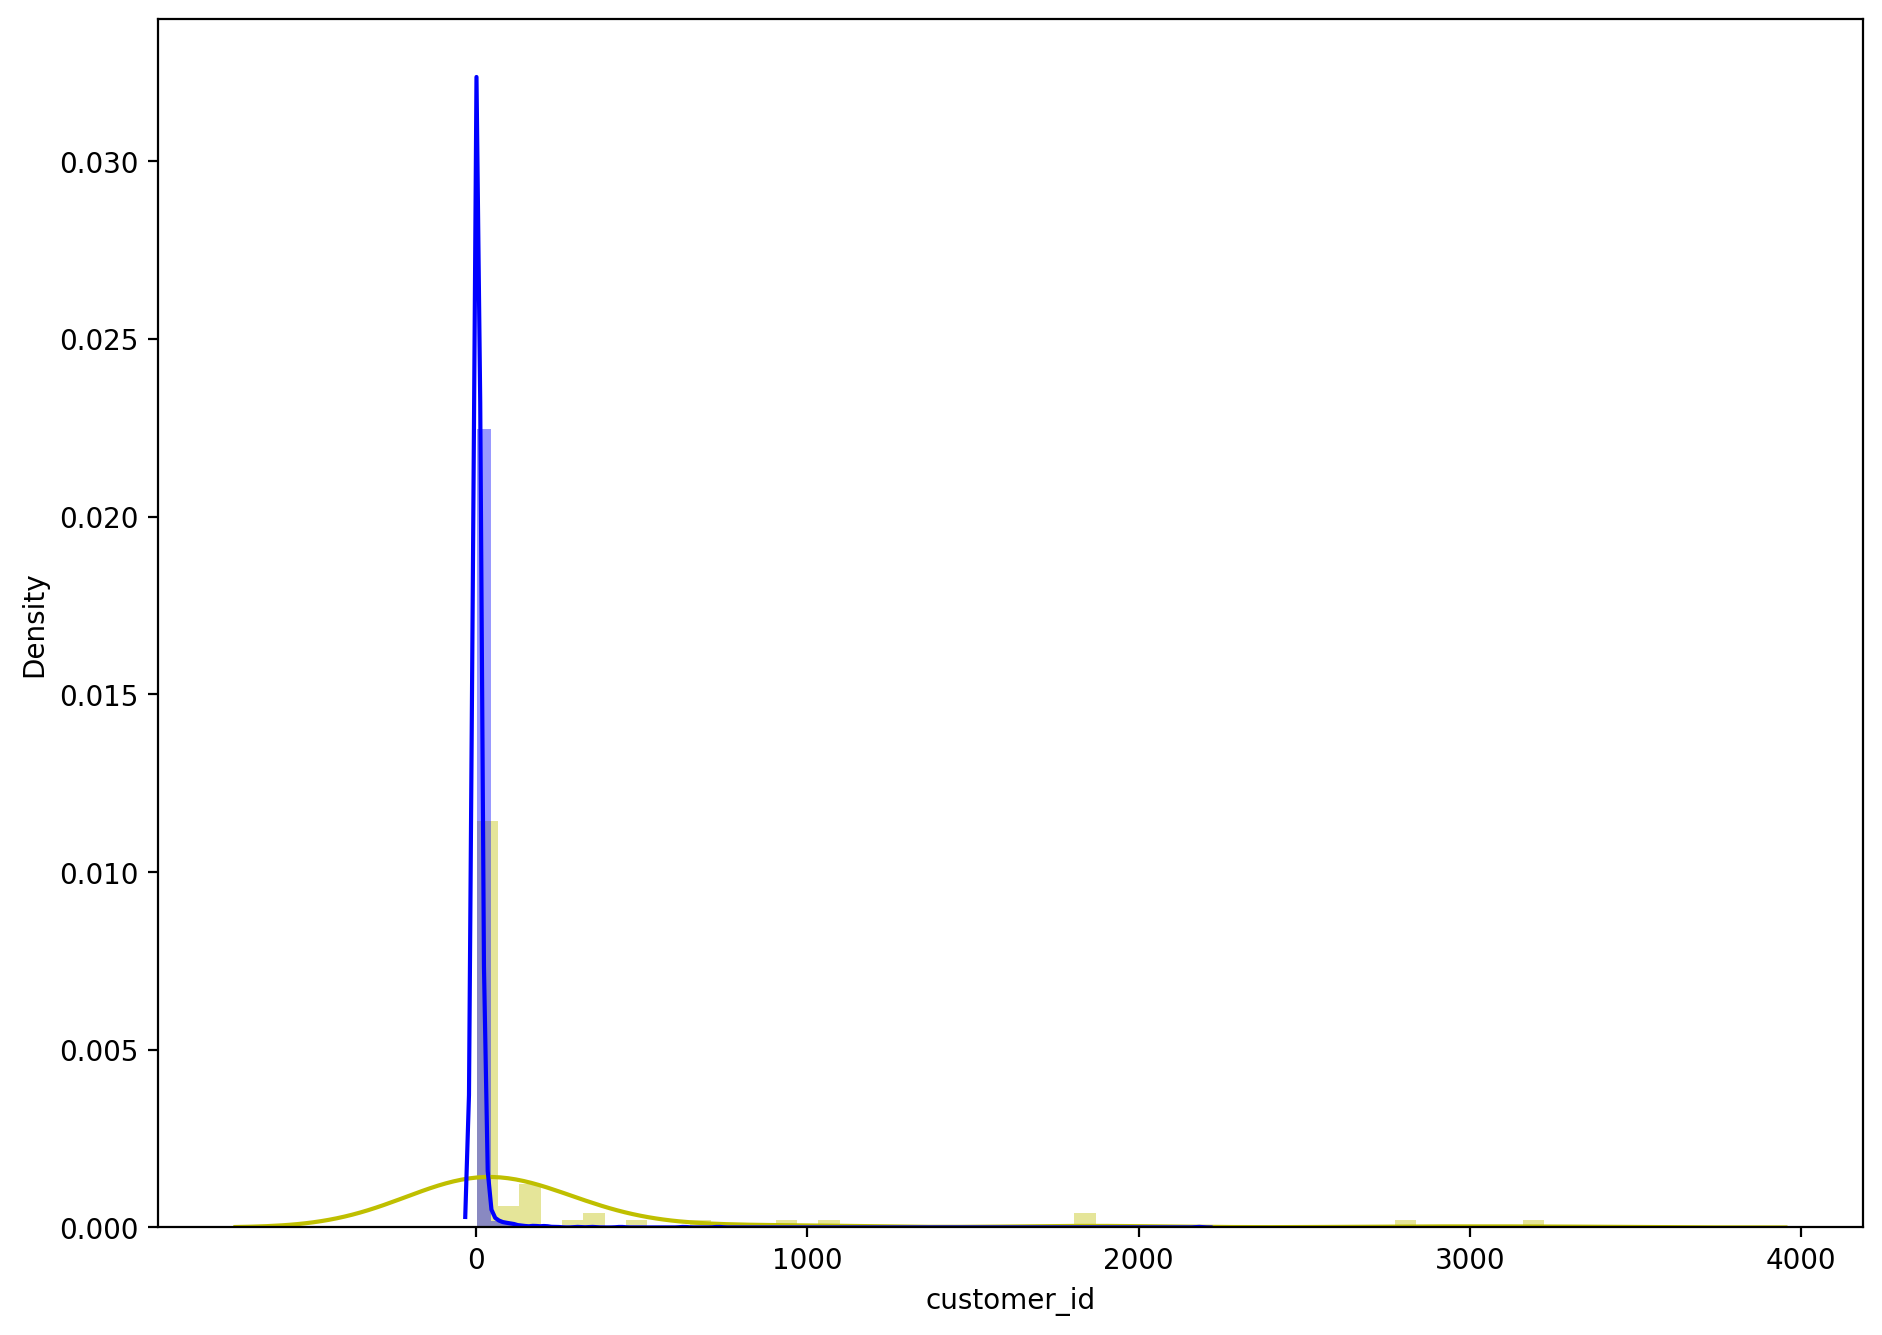

In [13]:
from matplotlib import pyplot as plt
res1 = data.groupby("country_id")["customer_id"].count()
res2 = data.groupby("city_id")["customer_id"].count()
fig=plt.figure(figsize=(11,8),dpi=200)
sns.distplot(res1, color="y")
sns.distplot(res2, color="b")


In [14]:
res=ks_2samp(res1, res2)
print("p_value is: ",res.pvalue)
if res.pvalue>0.05:
    print("The distributions are equal"+"\n")
else: 
    print("The two distributions are not equal"+"\n")

p_value is:  1.1102230246251565e-15
The two distributions are not equal



In [15]:
data.isnull().values.any()
data.viewer_type.value_counts()

WFO    11088
WFH     4769
Name: viewer_type, dtype: int64

<AxesSubplot:ylabel='Frequency'>

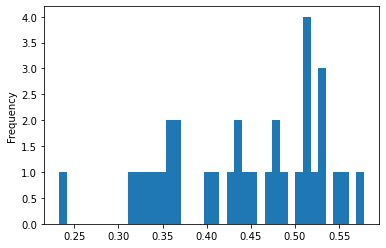

In [16]:
mean_customer_engagement= data.groupby("customer_id")["engagement"].mean()
mean_customer_engagement.plot.hist(bins=40)


In [13]:
test = data.groupby('viewer_id')
x = test.get_group(36698.0)
x = x.groupby("event_id")
y = x.get_group(262.0)
y

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
0,22489,1632944994003,17.0,262.0,36698.0,1095.0,1.0,WFH,1.0,0.0,0,2021-09-29 22:49:54.003


In [11]:
data

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date
0,22489,1632944994003,17.0,262.0,36698.0,1095.0,1.0,WFH,1.000000,0.00000,0,2021-09-29 22:49:54.003
1,45041,1633362264898,8.0,34.0,696.0,4.0,4.0,WFH,1.000000,0.69249,0,2021-10-04 18:44:24.898
2,67609,1633471635245,8.0,46.0,57.0,1514.0,4.0,WFH,1.000000,0.90000,0,2021-10-06 01:07:15.245
3,90051,1633643575369,8.0,79.0,552.0,4.0,4.0,WFO,1.000000,0.90000,0,2021-10-08 00:52:55.369
4,112622,1634154985730,5.0,63.0,34423.0,2.0,3.0,WFO,1.000000,0.90000,0,2021-10-13 22:56:25.730
...,...,...,...,...,...,...,...,...,...,...,...,...
13738,309003273,1646996505850,0.0,0.0,2636.0,307.0,0.0,WFH,1.000000,0.00000,0,2022-03-11 13:01:45.850
13739,309025867,1647000362782,11.0,7.0,69958.0,3.0,5.0,WFO,1.000000,0.90000,0,2022-03-11 14:06:02.782
13740,309048321,1647266714792,1.0,361.0,1129.0,6475.0,3.0,WFO,0.444853,0.00000,0,2022-03-14 16:05:14.792
13741,309070747,1647436991166,7.0,201.0,62072.0,7.0,7.0,WFO,1.000000,1.00000,0,2022-03-16 15:23:11.166


### Viewers’ engagement level duration over country/city/viewer type

In [11]:
test = data.groupby('viewer_id')
events=data["event_id"].unique()
viewers = data["viewer_id"].unique()
df = []
engagement_duration_level_nominator = 0
for i in viewers:
    x = test.get_group(i)
    events = x["event_id"].unique()
    x = x.groupby("event_id")
    for j in events: 
        k = x.get_group(j).sort_values(by = ["date"], axis = 0).reset_index()
        for it in range(0, len(k) - 1):
            weights=k["date"][it+1]-k["date"][it]
            timedelta_seconds = weights.total_seconds()
            final_weight=(timedelta_seconds/3600)*60
            engagement_duration_level_nominator = engagement_duration_level_nominator + (final_weight*k["engagement"][it+1])
        final_weight_sum = (k["date"][len(k)-1]-k["date"][0]).total_seconds()
        final_weight_sum = (final_weight_sum/3600)*60
        if(final_weight_sum == 0):
            engagement_duration_level = 0
        else:
            engagement_duration_level = engagement_duration_level_nominator/ final_weight_sum
        engagement_duration_level_nominator = 0
        df.append([j,i, engagement_duration_level, k["country_id"][0], k["city_id"][0], k["viewer_type"][0]])

In [13]:
dataframe = pd.DataFrame(df, columns = ["event_id", "viewer_id", "engagement_duration_level", "country_id", "city_id", "viewer_type"])
dataframe


,event_id,viewer_id,engagement_duration_level,country_id,city_id,viewer_type
0,107.0,11661.0,0.000000,3.0,2.0,WFO
1,141.0,11661.0,0.497525,3.0,2.0,WFO
2,30.0,11661.0,0.897767,3.0,2.0,WFO
3,177.0,11661.0,0.898998,3.0,314.0,WFH
4,107.0,12810.0,0.890198,3.0,2.0,WFH
...,...,...,...,...,...,...
183893,241.0,108645.0,0.000000,4.0,22.0,WFH
183894,385.0,32756.0,0.000000,1.0,1118.0,WFH
183895,90.0,108558.0,0.900000,2.0,1.0,WFO
183896,22.0,108820.0,0.000000,2.0,1.0,WFO


## Viewer's engagement level duration over country

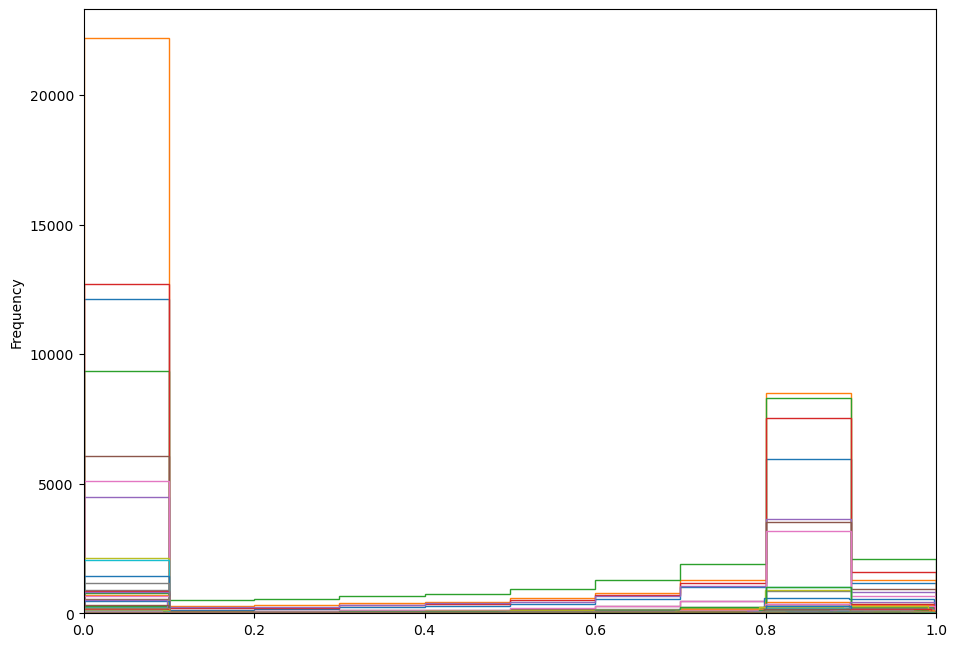

In [19]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
countries = dataframe.country_id.unique()
colors = ["y", "g", "m","c","r", "b", "k"]
df = dataframe.drop("viewer_type", axis = 1)

fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)

df.groupby("country_id")["engagement_duration_level"].plot.hist(histtype='step', stacked=True, fill=False)
    

    
plt.show()


## Viewer's engagement level duration over city

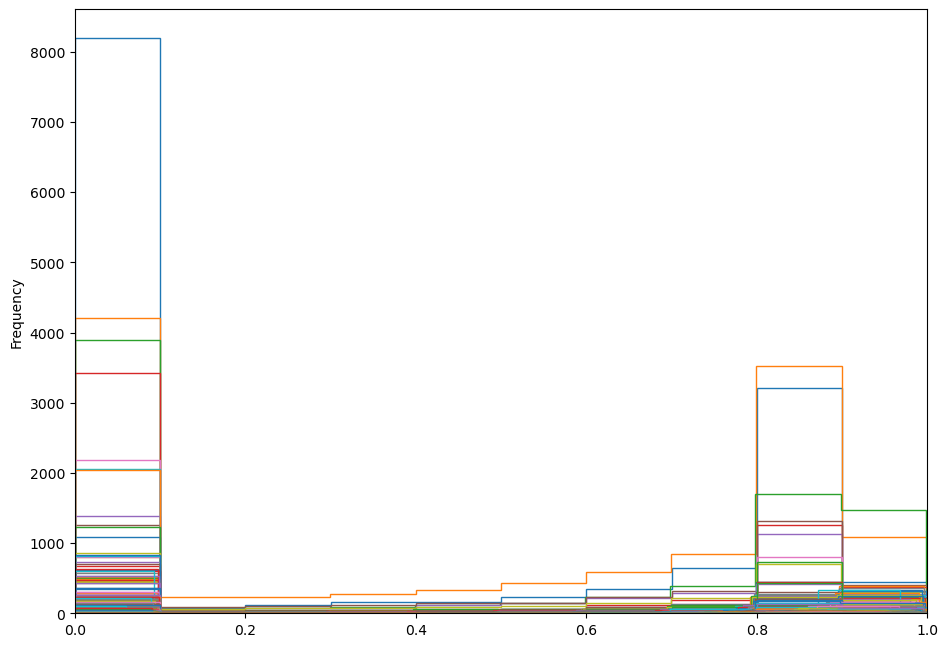

In [20]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["y", "g", "m","c","r", "b", "k"]

fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)

df.groupby("city_id")["engagement_duration_level"].plot.hist(histtype='step', stacked=True, fill=False)
    

    
plt.show()


## Viewer's engagement level duration over viewer type

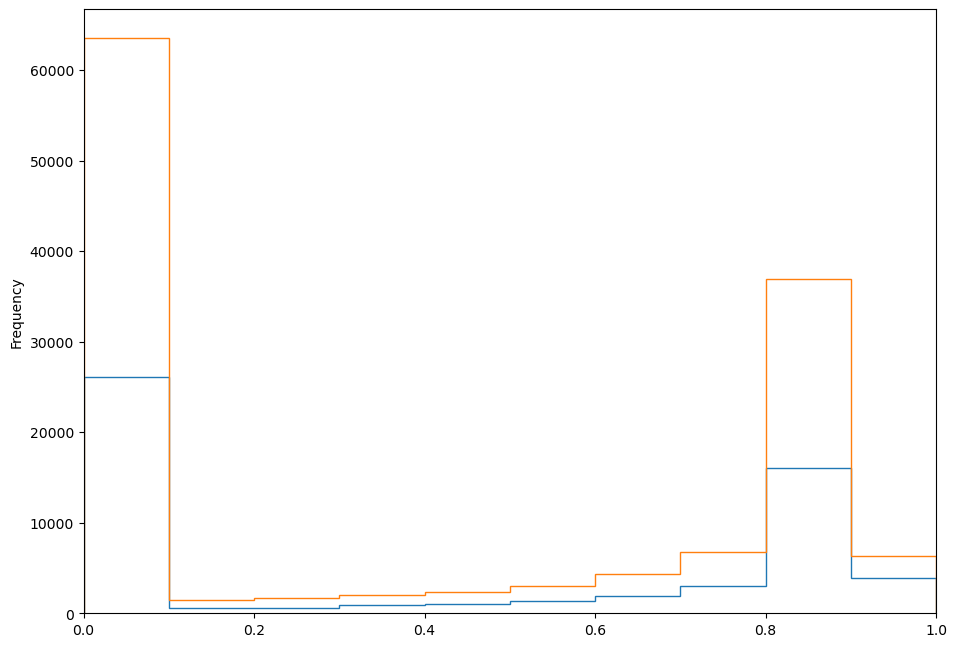

In [21]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlim(0,1)

dataframe.groupby("viewer_type")["engagement_duration_level"].plot.hist(histtype='step', stacked=True, fill=False)
    

    
plt.show()


### Correlation between numerical and categorical data points

In [4]:
data = data.drop(["Unnamed: 0"],axis = 1)

In [5]:
data

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,Month
0,1632765494725,5.0,107.0,7678.0,2.0,3.0,WFO,1.000000,0.9,0,2021-09-27 20:58:14.725,9
1,1632815291651,32.0,331.0,31437.0,3964.0,0.0,WFH,1.000000,0.0,0,2021-09-28 10:48:11.651,9
2,1632849801296,8.0,149.0,28264.0,92.0,16.0,WFO,1.000000,0.0,0,2021-09-28 20:23:21.296,9
3,1632912772310,7.0,360.0,64859.0,1343.0,6.0,WFO,1.000000,0.0,0,2021-09-29 13:52:52.310,9
4,1632929352249,10.0,20.0,35266.0,4437.0,6.0,WFH,1.000000,0.0,0,2021-09-29 18:29:12.249,9
...,...,...,...,...,...,...,...,...,...,...,...,...
82456,1647509853314,11.0,167.0,41886.0,3.0,5.0,WFO,1.000000,0.9,0,2022-03-17 11:37:33.314,3
82457,1647513896956,11.0,109.0,72897.0,3.0,5.0,WFO,1.000000,0.0,0,2022-03-17 12:44:56.956,3
82458,1647540142496,4.0,171.0,52305.0,11.0,1.0,WFO,0.848521,0.0,330,2022-03-17 20:02:22.496,3
82459,1647593488611,21.0,224.0,58680.0,24.0,0.0,WFH,1.000000,0.9,0,2022-03-18 10:51:28.611,3


In [6]:
from scipy.stats import f_oneway
categorical_data=["customer_id", "event_id","viewer_id","city_id","country_id","viewer_type"]
numerical_data=["engagement","qoe","buffer_ms","timestamp"]
 
for i in range(0,len(categorical_data)):
    for j in range(0,len(numerical_data)):
        CategoryGroupLists=data.groupby(categorical_data[i])[numerical_data[j]].apply(list)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value &gt; 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        print(categorical_data[i]+" and "+numerical_data[j]) 
        print('P-Value for Anova is: ', AnovaResults[1])
        
        if(AnovaResults[1]<=0.05):
            print("The two variables are correlated")
            print("\n")
            
        else: 
            print("The two variables are not correlated") 
            print("\n")
            
        

customer_id and engagement
P-Value for Anova is:  0.0
The two variables are correlated


customer_id and qoe
P-Value for Anova is:  1.4549124044839472e-142
The two variables are correlated


customer_id and buffer_ms
P-Value for Anova is:  0.3960488371413466
The two variables are not correlated


customer_id and timestamp
P-Value for Anova is:  0.0
The two variables are correlated


event_id and engagement
P-Value for Anova is:  0.0
The two variables are correlated


event_id and qoe
P-Value for Anova is:  0.0
The two variables are correlated


event_id and buffer_ms
P-Value for Anova is:  0.0
The two variables are correlated


event_id and timestamp
P-Value for Anova is:  0.0
The two variables are correlated


viewer_id and engagement
P-Value for Anova is:  0.0
The two variables are correlated


viewer_id and qoe
P-Value for Anova is:  0.0
The two variables are correlated


viewer_id and buffer_ms
P-Value for Anova is:  0.0
The two variables are correlated


viewer_id and timestamp
P-

### Correlation between categorical data points

In [7]:
from scipy.stats import chi2_contingency
categorical_data=["customer_id", "event_id","viewer_id","city_id","country_id","viewer_type"]
def chi_test(col1,col2):
    
    CrosstabResult=pd.crosstab(index=col1,columns=col2)


    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)
    
    # P-Value is the Probability of H0 being True
    # If P-Value < 0.05 then only we Accept the assumption(H0)

    print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
    return ChiSqResult[1]

    
for i in range(0,len(categorical_data)):
    for j in range(0, len(categorical_data)):
        if(categorical_data[i] == categorical_data[j]):
            continue
        else:
            print("Test between: ", categorical_data[i], categorical_data[j])
            res=chi_test(data[categorical_data[i]], data[categorical_data[j]])
            if(res<=0.05):
                print("The two variables are correlated")
                print("\n")

            else: 
                print("The two variables are not correlated") 
                print("\n")

Test between:  customer_id event_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  customer_id viewer_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  customer_id city_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  customer_id country_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  customer_id viewer_type
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  event_id customer_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  event_id viewer_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  event_id city_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  event_id country_id
The P-Value of the ChiSq Test is: 0.0
The two variables are correlated


Test between:  event_

In [37]:
corr = data.drop(["timestamp","customer_id", "event_id","viewer_id","city_id","country_id","viewer_type", "Month", "date"], axis = 1).corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,qoe,engagement,buffer_ms
qoe,1.000000,0.004106,-0.022436
engagement,0.004106,1.000000,-0.000162
buffer_ms,-0.022436,-0.000162,1.000000


In [38]:
corr = data.drop(["timestamp","customer_id", "event_id","viewer_id","city_id","country_id","viewer_type", "Month", "date"], axis = 1).corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,qoe,engagement,buffer_ms
qoe,1.000000,0.006942,-0.575774
engagement,0.006942,1.000000,-0.002820
buffer_ms,-0.575774,-0.002820,1.000000


In [39]:
corr = data.drop(["timestamp","customer_id", "event_id","viewer_id","city_id","country_id","viewer_type", "Month", "date"], axis = 1).corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,qoe,engagement,buffer_ms
qoe,1.000000,0.007316,-0.581653
engagement,0.007316,1.000000,-0.002949
buffer_ms,-0.581653,-0.002949,1.000000


### Correlation between viewer engagement and the following factors:

#### i) Number of viewers during the event

In [12]:
test = data.groupby('event_id')
events=data["event_id"].unique()
sum_viewers = {}
for i in events:
    num_of_viewers=len(test.get_group(i)["viewer_id"].unique())
    
    sum_viewers.update({i : num_of_viewers})

In [13]:
temp = []
for i in range(0, len(data)):
    temp.append(sum_viewers[data["event_id"][i]])

In [5]:
data["event_viewers"] = temp

#### ii) Day of the event

In [15]:
import calendar
temp = []
for i in range(0,len(data)):
    temp.append(calendar.day_name[data.date[i].weekday()])

In [16]:
data["day_of_the event"] = temp

#### iii) Duration of the event

In [17]:
test = data.groupby('event_id')
events=data["event_id"].unique()
duration_eve = {}
for i in events:
    x = test.get_group(i)["date"].sort_values().reset_index()
    duration = x["date"][len(x) - 1] - x["date"][0]
    duration_eve.update({i : duration})

In [18]:
temp = []
for i in range(0, len(data)):
    temp.append(duration_eve[data["event_id"][i]])

In [19]:
import numpy as np
data["event_duration"] = temp

data.event_duration=data.event_duration.astype('timedelta64[m]')
np.timedelta64(1,'m')

numpy.timedelta64(1,'m')

#### v) Viewers’ retention

In [20]:
test = data.groupby('event_id')
events=data["event_id"].unique()
viewers = []
df = []
for i in events:
    x = test.get_group(i)
    viewers = x["viewer_id"].unique()
    x = x.groupby("viewer_id")
    for j in viewers: 
        k = x.get_group(j)["date"].sort_values().reset_index()
        retention = k["date"][len(k) - 1] - k["date"][0]
        timedelta_seconds = retention.total_seconds()
        retention = (timedelta_seconds/3600)*60
        df.append([i,j, retention])

In [21]:
dataframe = pd.DataFrame(df, columns = ["event_id", "viewer_id", "retention"])

In [22]:
temp = []
for i in range(0, len(data)):
    x = dataframe[(dataframe["event_id"] == data["event_id"][i]) & (dataframe["viewer_id"] == data["viewer_id"][i])]["retention"].values
    temp.append(x)

In [23]:
data["retention_time"] = temp

In [24]:
for i in range(0, len(data)):
    data.retention_time[i] = data.retention_time[i][0]

<ipython-input-24-4fcc66ad34a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.retention_time[i] = data.retention_time[i][0]


In [4]:
data.retention_time = data.retention_time.astype("int64")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  15857 non-null  int64         
 1   customer_id                15857 non-null  float64       
 2   event_id                   15857 non-null  float64       
 3   viewer_id                  15857 non-null  float64       
 4   city_id                    15857 non-null  float64       
 5   country_id                 15857 non-null  float64       
 6   viewer_type                15857 non-null  object        
 7   qoe                        15857 non-null  float64       
 8   engagement                 15857 non-null  float64       
 9   buffer_ms                  15857 non-null  int64         
 10  date                       15857 non-null  datetime64[ns]
 11  Month                      15857 non-null  int64         
 12  enga

In [26]:
from scipy.stats import f_oneway
categorical_data=["day_of_the event", "country_id"]
numerical_data=["engagement"]

for i in range(0,len(categorical_data)):
    for j in range(0,len(numerical_data)):
        CategoryGroupLists=data.groupby(categorical_data[i])[numerical_data[j]].apply(list)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value|<0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        print(categorical_data[i]+" and "+numerical_data[j]) 
        print('P-Value for Anova is: ', AnovaResults[1])
        
        if(AnovaResults[1]<=0.05):
            print("The two variables are correlated")
            print("\n")
            
        else: 
            print("The two variables are not correlated") 
            print("\n")
            
        

day_of_the event and engagement
P-Value for Anova is:  7.979272270641478e-16
The two variables are correlated


country_id and engagement
P-Value for Anova is:  0.0
The two variables are correlated




In [27]:
corr = data.drop( ['timestamp', 'customer_id', 'event_id', 'viewer_id', 'city_id','country_id', 'viewer_type', 'qoe', 'buffer_ms', 'date','Month','day_of_the event'], axis = 1).corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,engagement,event_viewers,event_duration,retention_time
engagement,1.000000,-0.044287,0.093792,0.056634
event_viewers,-0.044287,1.000000,0.379002,0.243104
event_duration,0.093792,0.379002,1.000000,0.596919
retention_time,0.056634,0.243104,0.596919,1.000000


In [28]:
corr = data.drop( ['timestamp', 'customer_id', 'event_id', 'viewer_id', 'city_id','country_id', 'viewer_type', 'qoe', 'buffer_ms', 'date','Month','day_of_the event'], axis = 1).corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

,engagement,event_viewers,event_duration,retention_time
engagement,1.000000,-0.014453,0.087566,0.051742
event_viewers,-0.014453,1.000000,0.342730,0.149354
event_duration,0.087566,0.342730,1.000000,0.337917
retention_time,0.051742,0.149354,0.337917,1.000000


In [29]:
corr = data.drop( ['timestamp', 'customer_id', 'event_id', 'viewer_id', 'city_id','country_id', 'viewer_type', 'qoe', 'buffer_ms', 'date','Month','day_of_the event'], axis = 1).corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,engagement,event_viewers,event_duration,retention_time
engagement,1.000000,-0.018376,0.110944,0.060266
event_viewers,-0.018376,1.000000,0.474774,0.201270
event_duration,0.110944,0.474774,1.000000,0.438897
retention_time,0.060266,0.201270,0.438897,1.000000


In [49]:
data=data.drop(["timestamp","date","Month","day_of_the event"],axis=1)
data.head()

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,event_viewers,event_duration,retention_time
0,16.0,172.0,42408.0,38.0,1.0,WFH,1.0,0.0,0,28,80.0,0
1,8.0,34.0,6806.0,4.0,4.0,WFH,1.0,0.0,0,78,123.0,0
2,22.0,80.0,3356.0,1570.0,1.0,WFO,1.0,0.9,0,42,58.0,0
3,14.0,54.0,720.0,4.0,4.0,WFH,1.0,0.0,0,54,137.0,0
4,8.0,105.0,628.0,140.0,4.0,WFH,1.0,0.9,0,40,112.0,0


# Model

### Full data

In [3]:
data

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
20615365,309106383,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0
20615366,309106397,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0
20615367,309106412,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0
20615368,309106427,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0


In [4]:
data = data.drop(["Unnamed: 0", "timestamp"], axis = 1)
#+date

In [5]:
data

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...
20615365,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0
20615366,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0
20615367,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0
20615368,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20615370 entries, 0 to 20615369
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  float64
 1   event_id     float64
 2   viewer_id    float64
 3   city_id      float64
 4   country_id   float64
 5   viewer_type  object 
 6   qoe          float64
 7   engagement   float64
 8   buffer_ms    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ GB


In [7]:
full = data.drop(["customer_id", "event_id", "viewer_id", "city_id", "country_id", "viewer_type"], axis = 1)
full

,qoe,engagement,buffer_ms
0,0.999976,0.0,785
1,0.281964,0.9,3895
2,1.000000,0.9,0
3,0.999988,0.0,466
4,1.000000,0.0,0
...,...,...,...
20615365,1.000000,0.0,0
20615366,1.000000,0.0,0
20615367,1.000000,0.0,0
20615368,1.000000,0.9,0


In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler


trainX, testX = train_test_split(data, train_size=0.8)


scaler = MinMaxScaler()
trainX_scaled = scaler.fit_transform(trainX.drop(["customer_id", "event_id", "viewer_id", "city_id", "country_id", "viewer_type"], axis = 1))
testX_scaled = scaler.fit_transform(testX.drop(["customer_id", "event_id", "viewer_id", "city_id", "country_id", "viewer_type"], axis = 1))

model = IsolationForest(contamination=0.01, n_jobs = 1)

model.fit(trainX_scaled)


IsolationForest(contamination=0.01, n_jobs=1)

In [10]:
testX['scores']=model.decision_function(testX_scaled)
testX['anomaly']=model.predict(testX_scaled)

<ipython-input-10-3163c837c81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['scores']=model.decision_function(testX_scaled)
<ipython-input-10-3163c837c81a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['anomaly']=model.predict(testX_scaled)


In [11]:
testX[testX.anomaly == -1]

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,scores,anomaly
3699730,0.0,0.0,13892.0,242.0,0.0,WFH,0.052941,0.9,0,-0.009386,-1
8786656,1.0,85.0,71052.0,41.0,14.0,WFO,0.158812,0.0,10339,-0.094852,-1
1468773,30.0,562.0,63813.0,101.0,6.0,WFH,0.968313,1.0,5605,-0.044031,-1
10557717,17.0,102.0,30244.0,21.0,18.0,WFH,0.998943,0.0,34131,-0.025945,-1
1513387,4.0,6.0,11729.0,283.0,1.0,WFH,0.807305,0.0,8569,-0.055694,-1
...,...,...,...,...,...,...,...,...,...,...,...
8761652,5.0,141.0,12810.0,2.0,3.0,WFH,0.933755,0.0,2798,-0.004839,-1
16712379,15.0,72.0,2818.0,40.0,15.0,WFH,0.151223,0.0,19642,-0.098269,-1
11219856,4.0,44.0,96908.0,9.0,1.0,WFO,0.790793,0.9,12166,-0.064085,-1
6658962,1.0,42.0,38762.0,2723.0,13.0,WFO,0.205882,0.0,0,-0.001981,-1


In [12]:
trainX['scores']=model.decision_function(trainX_scaled)
trainX['anomaly']=model.predict(trainX_scaled)

<ipython-input-12-5d3b795b72bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['scores']=model.decision_function(trainX_scaled)
<ipython-input-12-5d3b795b72bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['anomaly']=model.predict(trainX_scaled)


In [13]:
data2 = [trainX, testX]
labeled_data = pd.concat(data2)
anomalies_data = labeled_data[labeled_data.anomaly == -1]

In [14]:
anomalies_data

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,scores,anomaly
18004133,15.0,98.0,7969.0,43.0,24.0,WFH,0.205882,0.00000,0,-0.001981,-1
6714261,15.0,72.0,87325.0,33.0,17.0,WFH,0.999952,0.24714,1866,-0.014021,-1
14125578,2.0,29.0,73741.0,1.0,2.0,WFO,0.111036,0.00000,6025,-0.083565,-1
6208154,12.0,429.0,4908.0,17.0,5.0,WFO,0.205882,0.00000,0,-0.001981,-1
13403364,2.0,29.0,60930.0,1.0,2.0,WFO,0.764360,0.00000,12948,-0.064722,-1
...,...,...,...,...,...,...,...,...,...,...,...
8761652,5.0,141.0,12810.0,2.0,3.0,WFH,0.933755,0.00000,2798,-0.004839,-1
16712379,15.0,72.0,2818.0,40.0,15.0,WFH,0.151223,0.00000,19642,-0.098269,-1
11219856,4.0,44.0,96908.0,9.0,1.0,WFO,0.790793,0.90000,12166,-0.064085,-1
6658962,1.0,42.0,38762.0,2723.0,13.0,WFO,0.205882,0.00000,0,-0.001981,-1


<AxesSubplot:ylabel='Frequency'>

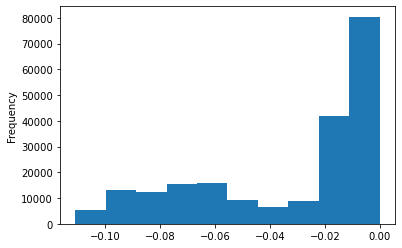

In [15]:
anomalies_data.scores.plot.hist()

In [16]:
final_anomalies_data = anomalies_data[anomalies_data.scores < -0.02]
final_anomalies_data

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,scores,anomaly
14125578,2.0,29.0,73741.0,1.0,2.0,WFO,0.111036,0.0,6025,-0.083565,-1
13403364,2.0,29.0,60930.0,1.0,2.0,WFO,0.764360,0.0,12948,-0.064722,-1
8864038,28.0,517.0,82938.0,1330.0,1.0,WFO,0.403748,0.0,13533,-0.081325,-1
2767216,3.0,4.0,1854.0,435.0,2.0,WFH,0.252526,0.0,10582,-0.086935,-1
3080807,0.0,0.0,7537.0,0.0,0.0,WFO,0.326020,0.0,6849,-0.075083,-1
...,...,...,...,...,...,...,...,...,...,...,...
18111884,17.0,39.0,27460.0,27.0,1.0,WFH,0.999362,0.9,26028,-0.031698,-1
12117518,5.0,177.0,69239.0,2.0,3.0,WFO,0.302846,0.0,7101,-0.083565,-1
17509475,0.0,0.0,9583.0,579.0,0.0,WFH,0.611220,0.0,9253,-0.070771,-1
16712379,15.0,72.0,2818.0,40.0,15.0,WFH,0.151223,0.0,19642,-0.098269,-1


In [17]:
labeled_data.loc[labeled_data.scores > -0.02, "anomaly"] = 1


In [18]:
len(labeled_data[labeled_data.anomaly == -1])

90558

In [19]:
labeled_data

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,scores,anomaly
20031336,1.0,232.0,63123.0,6.0,1.0,WFO,1.000000,0.9,0,0.404895,1
16885713,13.0,234.0,28423.0,36.0,0.0,WFO,1.000000,0.0,0,0.388723,1
3718553,2.0,29.0,57789.0,5.0,2.0,WFO,1.000000,0.0,0,0.388723,1
12025634,7.0,100.0,1837.0,1713.0,5.0,WFH,1.000000,0.9,0,0.404895,1
4391127,5.0,131.0,30543.0,2.0,3.0,WFO,1.000000,0.9,0,0.404895,1
...,...,...,...,...,...,...,...,...,...,...,...
19140839,20.0,165.0,55636.0,1089.0,6.0,WFO,1.000000,0.9,0,0.404895,1
15949838,0.0,3.0,1994.0,36.0,0.0,WFH,0.999787,0.0,5074,-0.002948,1
8266815,1.0,2.0,32481.0,14.0,3.0,WFO,1.000000,0.9,0,0.404895,1
17405737,0.0,0.0,7698.0,0.0,0.0,WFO,1.000000,0.9,0,0.404895,1


In [21]:
evaluation_data = labeled_data.drop(["scores", "anomaly", "customer_id", "event_id", "viewer_id", "city_id", "country_id", "viewer_type"], axis = 1)
evaluation_data = scaler.fit_transform(evaluation_data)
yhat = model.predict(evaluation_data)

In [22]:
from sklearn.metrics import classification_report
y_true = labeled_data["anomaly"]
print(classification_report(y_true, yhat))

              precision    recall  f1-score   support

          -1       0.44      1.00      0.61     90558
           1       1.00      0.99      1.00  20524812

    accuracy                           0.99  20615370
   macro avg       0.72      1.00      0.80  20615370
weighted avg       1.00      0.99      1.00  20615370



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, yhat)

array([[   90476,       82],
       [  115503, 20409309]], dtype=int64)

In [24]:
tn, fp, fn, tp = confusion_matrix(y_true, yhat).ravel()
specificity = tn / (tn+fp)

## Results Explanation

### Countries

In [35]:
countries = labeled_data["country_id"].unique()
gk = labeled_data.groupby('country_id')
df = []
for country in countries:
    test = gk.get_group(country)
    df.append([country, len(test[test.anomaly == -1])])
    

    

In [37]:
countries_anomalies = pd.DataFrame(df, columns = ["country_id", "anomalies_count"])
countries_anomalies

,country_id,anomalies_count
0,1.0,22596
1,0.0,14293
2,2.0,7046
3,5.0,1901
4,3.0,6614
...,...,...
119,122.0,1
120,116.0,1
121,118.0,3
122,121.0,1


    country_id  anomalies_count
0          1.0            22596
1          0.0            14293
10         4.0             7135
2          2.0             7046
4          3.0             6614
12        12.0             4332
42        25.0             4016
6          7.0             3875
13        13.0             1956
3          5.0             1901
15        18.0             1842
14         6.0             1422
30         8.0             1365
22        16.0             1259
33        23.0              981
9         17.0              880
7         14.0              836
5         24.0              833
17         9.0              743
19        10.0              553


<AxesSubplot:>

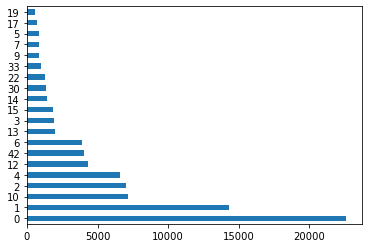

In [71]:
countries_anomalies = countries_anomalies.sort_values(by = ["anomalies_count"], ascending = False)
print(countries_anomalies.head(20))
countries_anomalies['anomalies_count'][:20].plot(kind='barh')

### Events

In [40]:
events = labeled_data["event_id"].unique()
gk = labeled_data.groupby('event_id')
df = []
for event in events:
    test = gk.get_group(event)
    df.append([event, len(test[test.anomaly == -1])])
    

In [41]:
event_anomalies = pd.DataFrame(df, columns = ["event_id", "anomalies_count"])
event_anomalies

,event_id,anomalies_count
0,232.0,39
1,234.0,4
2,29.0,3161
3,100.0,272
4,131.0,255
...,...,...
726,728.0,0
727,706.0,0
728,718.0,0
729,606.0,1


     event_id  anomalies_count
97       12.0             7562
23        6.0             6819
156      18.0             3595
2        29.0             3161
34        2.0             2993
12        0.0             2257
92       10.0             1704
148      39.0             1574
11        3.0             1510
259     158.0             1472
7        44.0             1180
100      82.0             1063
96      182.0             1054
205     156.0             1052
286     201.0             1028
101      11.0              923
70       66.0              895
29        1.0              892
153      42.0              817
345     163.0              814


<AxesSubplot:>

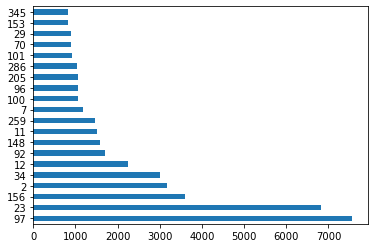

In [72]:
event_anomalies = event_anomalies.sort_values(by = ["anomalies_count"], ascending = False)
print(event_anomalies.head(20))
event_anomalies['anomalies_count'][:20].plot(kind='barh')

### Customer

In [42]:
customers = labeled_data["customer_id"].unique()
gk = labeled_data.groupby('customer_id')
df = []
for customer in customers:
    test = gk.get_group(customer)
    df.append([customer, len(test[test.anomaly == -1])])
    

In [43]:
customer_anomalies = pd.DataFrame(df, columns = ["customer_id", "anomalies_count"])
customer_anomalies

,customer_id,anomalies_count
0,1.0,8443
1,13.0,665
2,2.0,6350
3,7.0,5219
4,5.0,2298
5,16.0,3517
6,18.0,805
7,4.0,13391
8,25.0,97
9,6.0,11455


    customer_id  anomalies_count
7           4.0            13391
9           6.0            11455
0           1.0             8443
10          0.0             6444
2           2.0             6350
3           7.0             5219
12         15.0             4443
14         14.0             4360
19          8.0             3845
13         17.0             3528
5          16.0             3517
27         21.0             2831
4           5.0             2298
23          9.0             1898
16         12.0             1880
11          3.0             1567
18         19.0             1546
26         22.0             1426
24         11.0             1059
6          18.0              805


<AxesSubplot:>

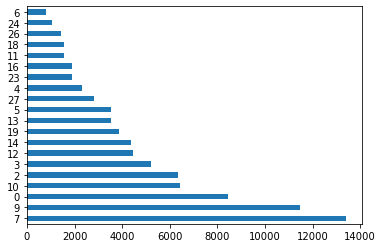

In [73]:
customer_anomalies = customer_anomalies.sort_values(by = ["anomalies_count"], ascending = False)
print(customer_anomalies.head(20))
customer_anomalies['anomalies_count'][:20].plot(kind='barh')

### Viewer type

In [45]:
v_types = labeled_data["viewer_type"].unique()
gk = labeled_data.groupby('viewer_type')
df = []
for v_type in v_types:
    test = gk.get_group(v_type)
    df.append([v_type, len(test[test.anomaly == -1])])
    

In [46]:
v_type_anomalies = pd.DataFrame(df, columns = ["viewer_type", "anomalies_count"])
v_type_anomalies

,viewer_type,anomalies_count
0,WFO,64512
1,WFH,26046


  viewer_type  anomalies_count
0         WFO            64512
1         WFH            26046


<AxesSubplot:>

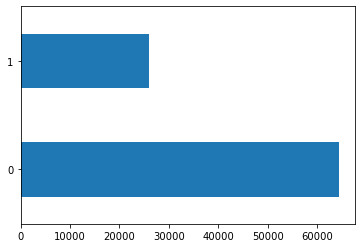

In [74]:
v_type_anomalies = v_type_anomalies.sort_values(by = ["anomalies_count"], ascending = False)
print(v_type_anomalies.head(2))
v_type_anomalies['anomalies_count'][:2].plot(kind='barh')

## Viewers

In [78]:
viewers = labeled_data["viewer_id"].unique()
gk = labeled_data.groupby('viewer_id')
df = []
for viewer in viewers:
    test = gk.get_group(viewer)
    df.append([viewer, len(test[test.anomaly == -1])])

In [79]:
viewer_anomalies = pd.DataFrame(df, columns = ["viewer_id", "anomalies_count"])
viewer_anomalies

,viewer_id,anomalies_count
0,63123.0,0
1,28423.0,0
2,57789.0,0
3,1837.0,0
4,30543.0,2
...,...,...
101331,108928.0,0
101332,108948.0,0
101333,63815.0,0
101334,25769.0,0


       viewer_id  anomalies_count
35219    51734.0              145
65820    55689.0              135
48895     5485.0              130
29493    77645.0              116
19719      285.0              110
47571    30804.0               93
52244    40803.0               90
3505     14403.0               87
34748    75760.0               86
81477    67862.0               85
19878    13616.0               85
8739      6222.0               84
53102    49785.0               82
14365     3416.0               82
67991    11981.0               81
84331    83114.0               81
50397    26704.0               74
25177    15942.0               74
24191    24232.0               72
74409    84619.0               70


<AxesSubplot:>

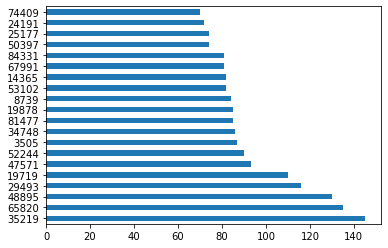

In [82]:
viewer_anomalies = viewer_anomalies.sort_values(by = ["anomalies_count"], ascending = False)
print(viewer_anomalies.head(20))
viewer_anomalies['anomalies_count'][:20].plot(kind='barh')

In [11]:
viewers = [51734.0, 55689.0, 5485.0, 77645.0, 285.0, 30804.0, 40803.0, 14403.0 , 75760.0, 67862.0, 13616.0, 6222.0, 49785.0, 3416.0, 11981.0, 83114.0, 26704.0 ,  15942.0 , 24232.0, 84619.0]

In [43]:
gk = data.groupby('viewer_id')
df = []
for viewer in viewers:
    test = gk.get_group(viewer).reset_index()
    df.append([viewer, test.viewer_type[0], test.country_id[0], test.city_id[0], test.event_id[0], test.customer_id[0]])

In [44]:
viewer_anomalies = pd.DataFrame(df, columns = ["viewer_id", "viewer_type", "country", "city", "event", "customer"])
viewer_anomalies

,viewer_id,viewer_type,country,city,event,customer
0,51734.0,WFH,24.0,43.0,558.0,15.0
1,55689.0,WFH,12.0,2982.0,206.0,22.0
2,5485.0,WFO,0.0,0.0,1.0,0.0
3,77645.0,WFH,25.0,323.0,49.0,6.0
4,285.0,WFH,7.0,7.0,26.0,7.0
5,30804.0,WFO,1.0,9.0,14.0,4.0
6,40803.0,WFO,0.0,29.0,12.0,6.0
7,14403.0,WFH,88.0,3092.0,42.0,1.0
8,75760.0,WFO,16.0,2717.0,149.0,8.0
9,67862.0,WFO,23.0,6161.0,2.0,1.0


<AxesSubplot:>

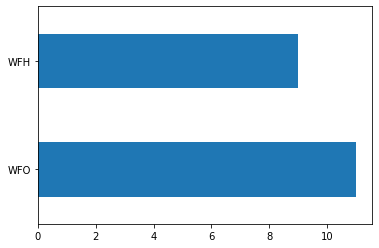

In [34]:
viewer_anomalies.viewer_type.value_counts().plot(kind='barh')

In [41]:
viewer_anomalies.country.value_counts()

0.0     3
25.0    3
7.0     3
1.0     2
16.0    2
3.0     2
24.0    1
12.0    1
88.0    1
23.0    1
4.0     1
Name: country, dtype: int64

In [50]:
viewer_anomalies.customer.value_counts()

7.0     3
0.0     2
6.0     2
1.0     2
8.0     2
21.0    2
5.0     2
15.0    1
22.0    1
4.0     1
17.0    1
14.0    1
Name: customer, dtype: int64

In [66]:
customers = [4.0,6.0,1.0,0.0,2.0,7.0,15.0,14.0,8.0,17.0,16.0,21.0,5.0,9.0,12.0,3.0,19.0,22.0,11.0,18.0]
df = []
for customer in customers:
    test = gk.get_group(customer).reset_index()
    df.append([customer, test.country_id[0]])

In [67]:
viewer_anomalies = pd.DataFrame(df, columns = ["customer", "country"])
viewer_anomalies

,customer,country
0,4.0,4.0
1,6.0,1.0
2,1.0,1.0
3,0.0,7.0
4,2.0,4.0
5,7.0,4.0
6,15.0,4.0
7,14.0,4.0
8,8.0,4.0
9,17.0,4.0


In [68]:
viewer_anomalies.country.value_counts()

4.0    12
7.0     6
1.0     2
Name: country, dtype: int64